<a href="https://colab.research.google.com/github/Fawaz-Khan-R/RedVinoWine-prediction/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Wine quality prediction Notebook


#Initial libraries that are needed

In [550]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
plt.style.use('ggplot')

import plotly.express as px

#Aim for the model
Based on the given features, we going to predict the quality of the wines.
Hence the dataset is named as "wine quality" :)


#Exploratory Data analysis

In [551]:
#You can find the dataset in my Github
df = pd.read_csv("/content/winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [552]:
df["type"].unique()

array(['white', 'red'], dtype=object)

We observe that there are 2 types of wines in the dataset: "red" and "white".<br>We shall only create a model for features of "red" wines for better quality.

In [553]:
df1 = df.query('type == "red"')
df1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4899,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
4900,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4901,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4902,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##EDA for "red" wines

In [555]:
df1.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1597.00,1598.00,1598.00,1599.00,1599.00,1599.00,1599.00,1599.00,1597.00,1597.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [556]:
df1.shape

(1599, 13)

In [557]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 4898 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1599 non-null   object 
 1   fixed acidity         1597 non-null   float64
 2   volatile acidity      1598 non-null   float64
 3   citric acid           1598 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1597 non-null   float64
 10  sulphates             1597 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 174.9+ KB


Input variables:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable:
1. quality (0 - 10)

In [558]:
#Checking for null values
df1.isna().sum()

type                    0
fixed acidity           2
volatile acidity        1
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [559]:
#Removing null values
df1 = df1.dropna()
df1.shape

(1593, 13)

In [560]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1593 entries, 4898 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1593 non-null   object 
 1   fixed acidity         1593 non-null   float64
 2   volatile acidity      1593 non-null   float64
 3   citric acid           1593 non-null   float64
 4   residual sugar        1593 non-null   float64
 5   chlorides             1593 non-null   float64
 6   free sulfur dioxide   1593 non-null   float64
 7   total sulfur dioxide  1593 non-null   float64
 8   density               1593 non-null   float64
 9   pH                    1593 non-null   float64
 10  sulphates             1593 non-null   float64
 11  alcohol               1593 non-null   float64
 12  quality               1593 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 174.2+ KB


In [561]:
df1['quality'].unique()

array([5, 6, 7, 4, 8, 3])

<Axes: >

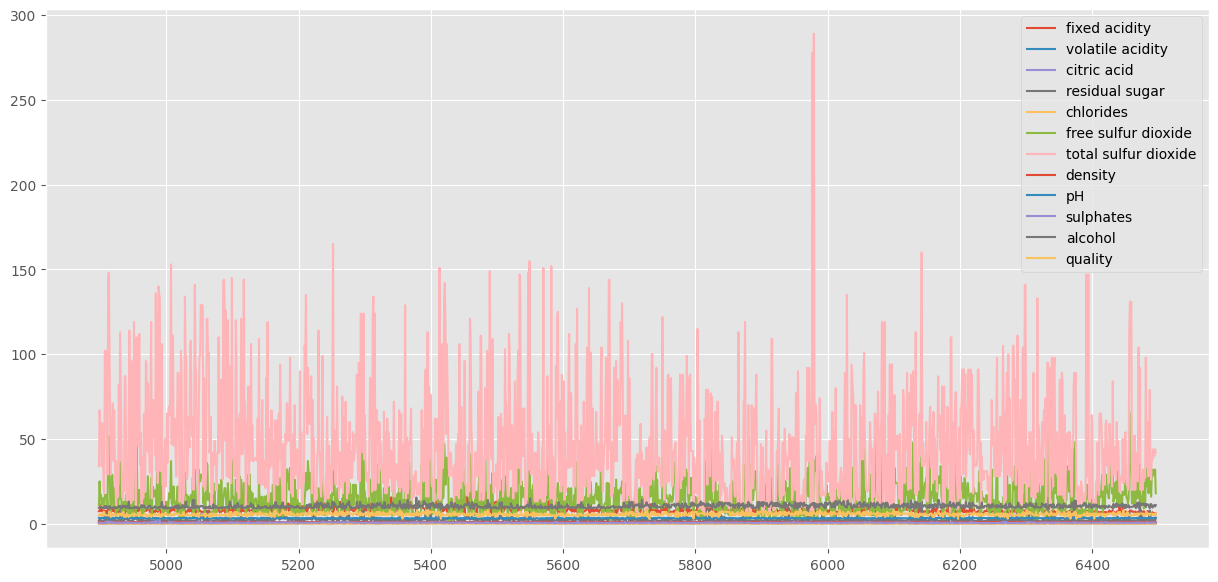

In [562]:
#simple bar chart of all the features for our observation
df1.plot(figsize=(15,7))

Since there are 6 unique quality values we will proceed to group the dataset based on it's respective qualities means

In [563]:
df1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [564]:
df1 = df1.drop("type",axis=1)

In [565]:
qua_grp = df1.groupby(df1["quality"]).mean()
qua_grp

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.805769,0.697115,0.175769,2.671154,0.090058,12.230769,36.346154,0.996537,3.379231,0.595000,10.250962
5,8.170294,0.576853,0.243897,2.528456,0.092753,16.989706,56.555882,0.997105,3.304515,0.620912,9.899265
6,8.357729,0.497169,0.274732,2.478628,0.085063,15.619874,40.771293,0.996626,3.317555,0.674748,10.622923
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


<Axes: xlabel='quality'>

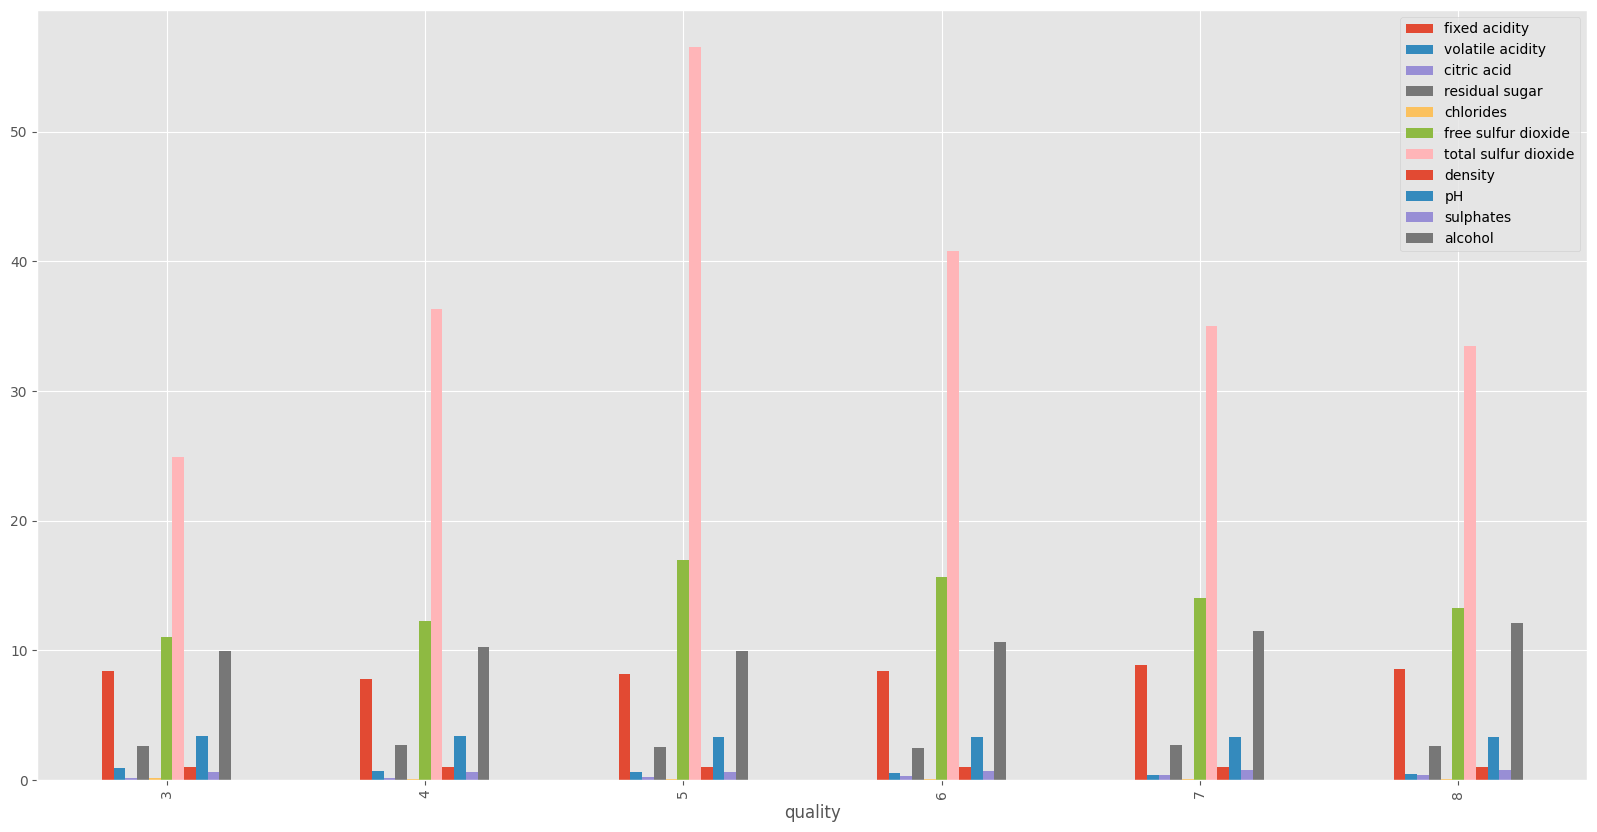

In [566]:
qua_grp.plot(kind="bar",figsize=(20,10))

###Impact of features on the quality of the "red" wines

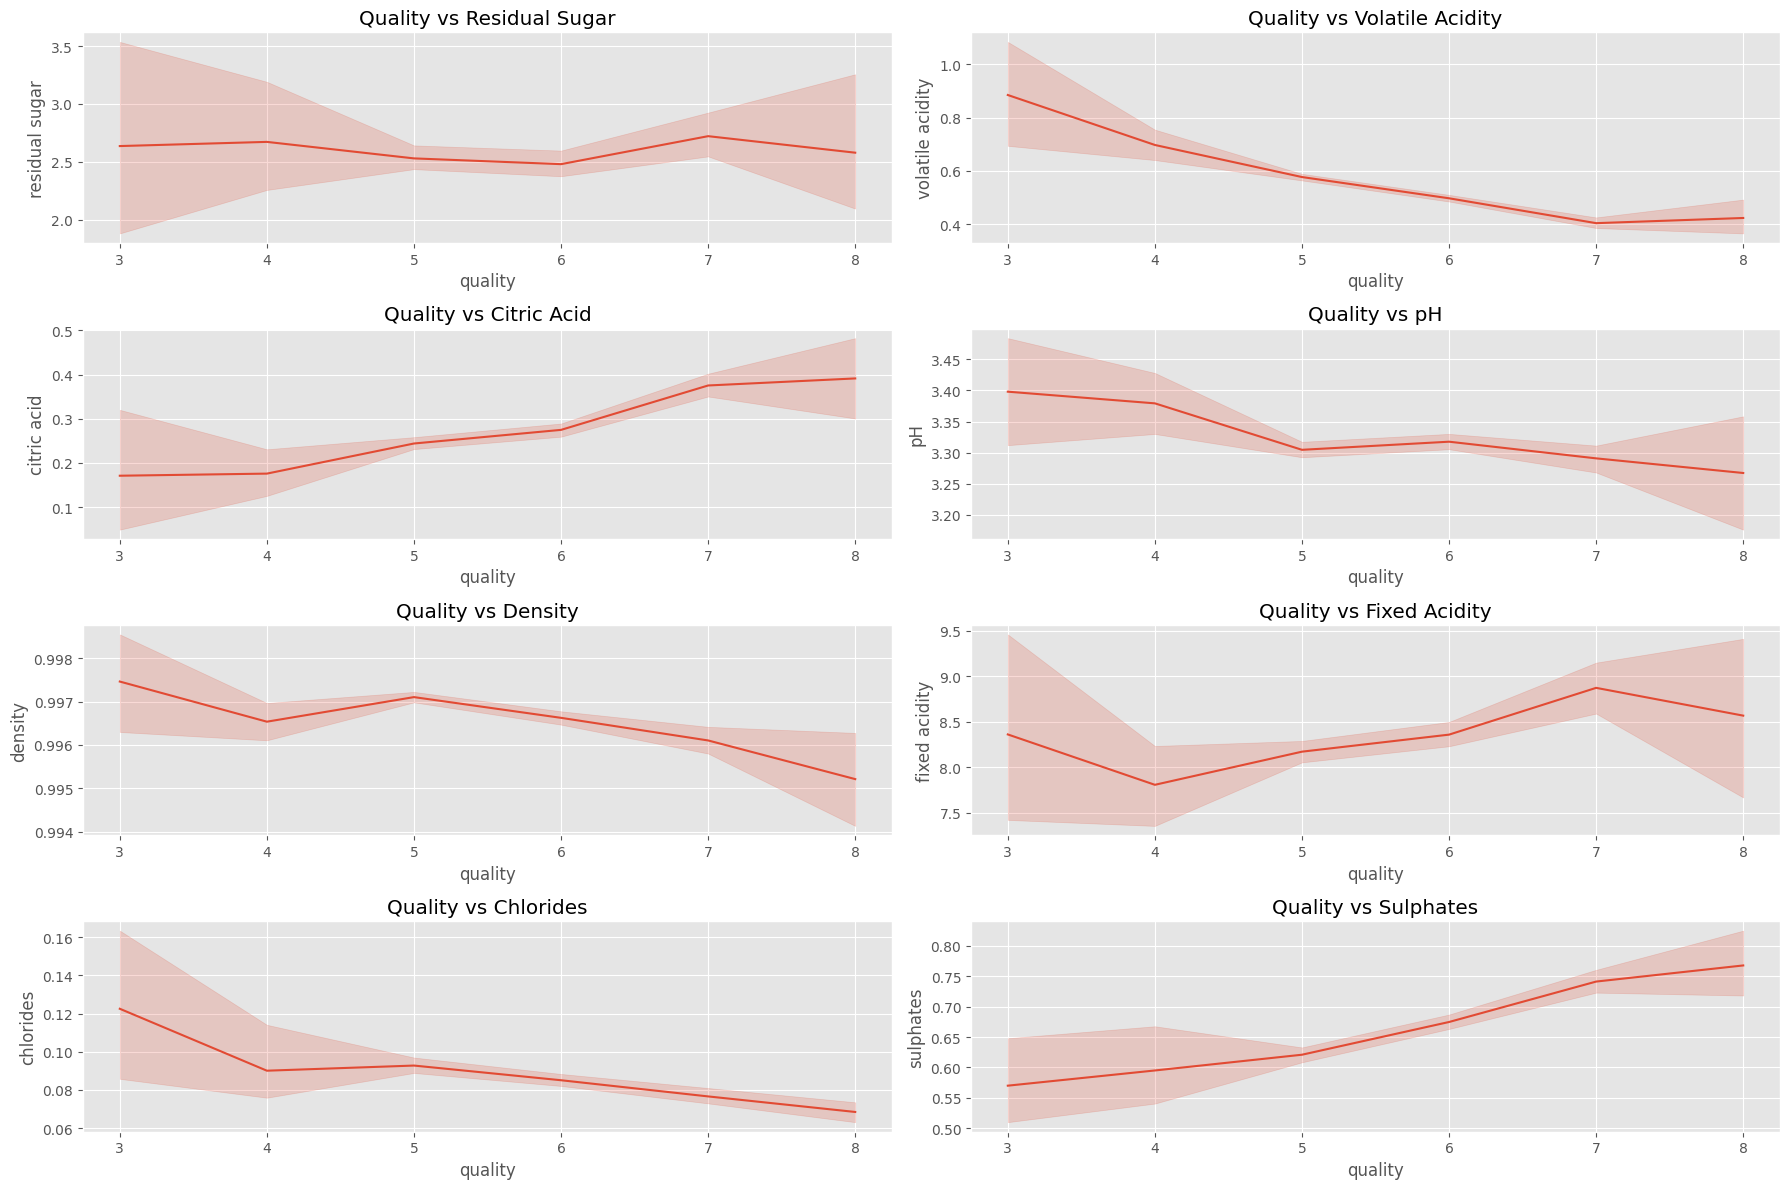

In [567]:
fig = plt.figure(figsize=(18,12))  # Adjusted figsize for better display

#1st graph
#Quality vs Residual Sugar
ax1 = plt.subplot2grid((4,2),(0,0))
sns.lineplot(data=df1,x="quality",y="residual sugar")
plt.title("Quality vs Residual Sugar")

#2nd graph
#Quality vs Volatile Acidity
ax2 = plt.subplot2grid((4,2),(0,1))
sns.lineplot(data=df1,x="quality",y="volatile acidity")
plt.title("Quality vs Volatile Acidity")

#3rd graph
#Quality vs Citric Acid
ax3 = plt.subplot2grid((4,2),(1,0))
sns.lineplot(data=df1,x="quality",y="citric acid")
plt.title("Quality vs Citric Acid")

#4th graph
#Quality vs pH
ax4 = plt.subplot2grid((4,2),(1,1))
sns.lineplot(data=df1,x="quality",y="pH")
plt.title("Quality vs pH")

#5th graph
#Quality vs Density
ax5 = plt.subplot2grid((4,2),(2,0))
sns.lineplot(data=df1,x="quality",y="density")
plt.title("Quality vs Density")

#6th graph
#Quality vs Fixed Acidity
ax6 = plt.subplot2grid((4,2),(2,1))
sns.lineplot(data=df1,x="quality",y="fixed acidity")
plt.title("Quality vs Fixed Acidity")

#7th graph
#Quality vs Chlorides
ax7 = plt.subplot2grid((4,2),(3,0))
sns.lineplot(data=df1,x="quality",y="chlorides")
plt.title("Quality vs Chlorides")

#8th graph
#Quality vs Sulphates
ax8 = plt.subplot2grid((4,2),(3,1))  # Corrected the axis variable name to ax8
sns.lineplot(data=df1,x="quality",y="sulphates")
plt.title("Quality vs Sulphates")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


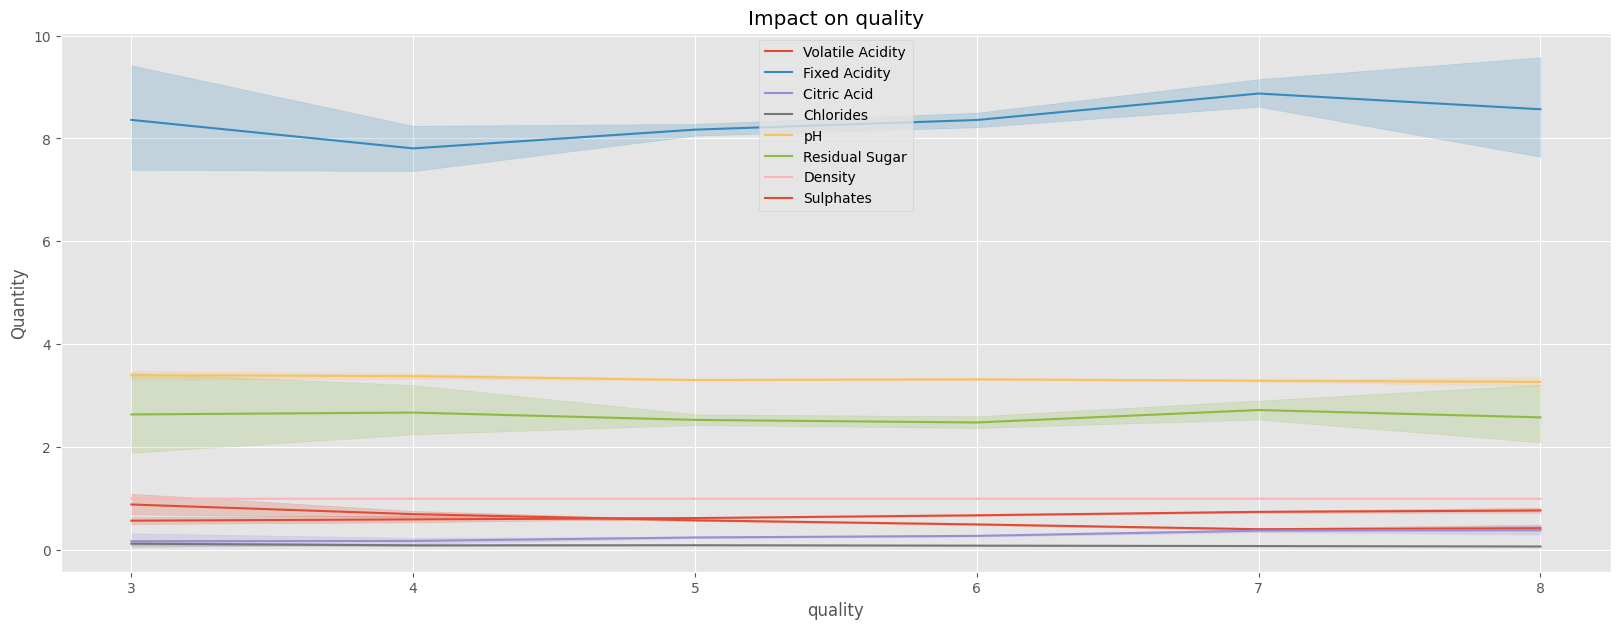

In [568]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df1,x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df1,x="quality",y="fixed acidity",label="Fixed Acidity")
sns.lineplot(data=df1,x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df1,x="quality",y="chlorides",label="Chlorides")
sns.lineplot(data=df1,x="quality",y="pH",label="pH")
sns.lineplot(data=df1,x="quality",y="residual sugar",label="Residual Sugar")
sns.lineplot(data=df1,x="quality",y="density",label="Density")
sns.lineplot(data=df1,x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

Since most of the lines from this graph show minimal effect, We can conclude that the below features:
1.   Volatile acidity
2.   Citric acid
3.   Chlorides
4.   pH
5.   Sulphates
6.   Residual Sugar
7.   Fixed acidity
8.   Density
<br> Provide minimal impact to the quality of the wine 🍷


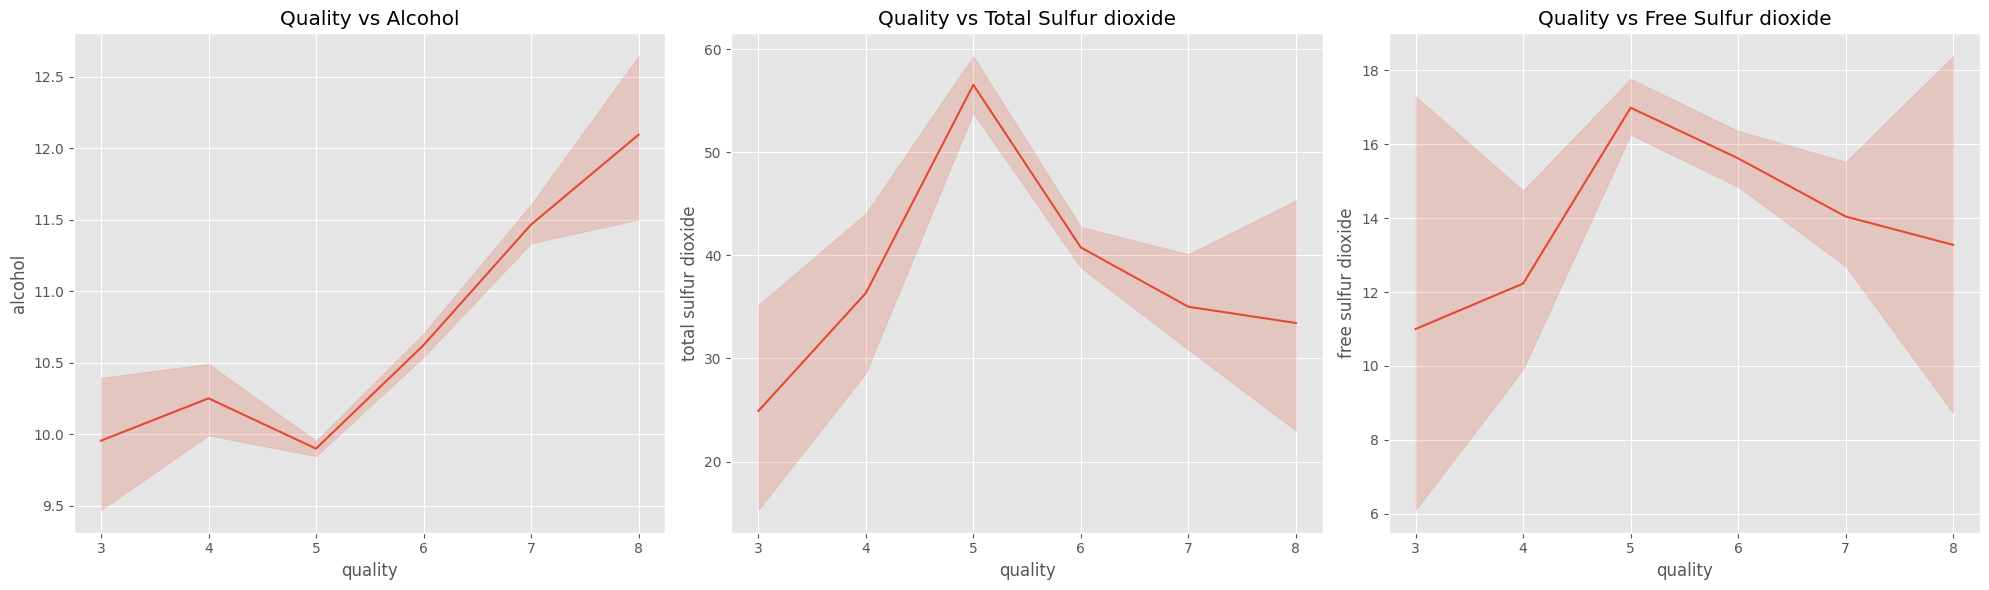

In [569]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot2grid((1,3),(0,0))
sns.lineplot(data=df1,x="quality",y="alcohol")
plt.title("Quality vs Alcohol")

ax2 = plt.subplot2grid((1,3),(0,1))
sns.lineplot(data=df1,x="quality",y="total sulfur dioxide")
plt.title("Quality vs Total Sulfur dioxide")

ax3 = plt.subplot2grid((1,3),(0,2))
sns.lineplot(data=df1,x="quality",y="free sulfur dioxide")
plt.title("Quality vs Free Sulfur dioxide")

plt.tight_layout()
plt.show()

We observe that Alcohol, Total Sulfur dioxide and Free Sulfur dioxide drastically affect the Quality of the wine.<br>
For comparison purposes, We shall also implement lineplots for all the 3 aforementioned graphs in one plot.

<Axes: xlabel='quality', ylabel='alcohol'>

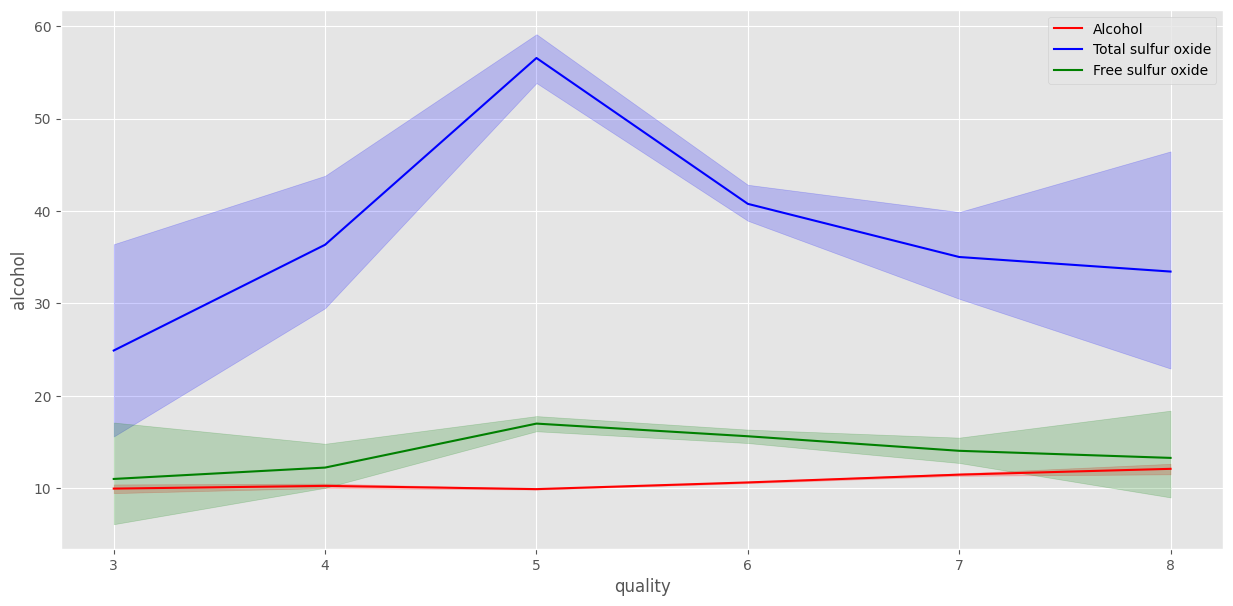

In [570]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df1,x="quality",y="alcohol",label ="Alcohol",color="r") #red is default anyway
sns.lineplot(data=df1,x="quality",y="total sulfur dioxide",label="Total sulfur oxide",color="b")
sns.lineplot(data=df1,x="quality",y="free sulfur dioxide",label = "Free sulfur oxide",color="g")

In [571]:
px.scatter(df1,x="free sulfur dioxide",y="total sulfur dioxide",animation_frame="quality")

In [572]:
px.scatter(df1,x="free sulfur dioxide",y="alcohol",animation_frame="quality")

In [573]:
px.scatter(df1,x="total sulfur dioxide",y="alcohol",animation_frame="quality")

#Binary Classification of Outputs (Binning)
Since there are 6 different values for quality we shall use binnning method to segregate the outputs into 2 categories.

In [574]:
df1['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [575]:
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
df1['quality'] = pd.cut(df1['quality'], bins = bins, labels = group_names)

label_quality = LabelEncoder()
df1['quality'] = label_quality.fit_transform(df1['quality'])
df1['quality'].value_counts()

quality
0    1376
1     217
Name: count, dtype: int64

#Model Building

## Importing the ML Libraries

In [576]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC ,SVR
from sklearn.datasets import make_classification

##Feature Selection

We had observed from the EDA process that the 3 main features are:
- alcohol
- free sulfur dioxide
- total sulfur dioxide
<br>So we shall include only those features in our dataset.

In [577]:
#Defined X value and y value , and split the data train
X = df1[["alcohol","free sulfur dioxide","total sulfur dioxide"]]
y = df1["quality"]    # y = quality

In [578]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (1274, 3)
X Test  :  (319, 3)
Y Train :  (1274,)
Y Test  :  (319,)


In [579]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

##1. Logistic Regression


In [580]:
# using the model Logistic Regression
Lo_model=LogisticRegression(solver='liblinear')

# fit model
Lo_model.fit(X_train,y_train)


# Score X and Y - test and train model Logistic Regression
print("Score the X-train with Y-train is : ", Lo_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Lo_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_Lo=Lo_model.predict(X_test)
print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_Lo))

print("_ "*40)
print("Classification report")
print(classification_report(y_test, y_pred_Lo))

Score the X-train with Y-train is :  0.8681318681318682
Score the X-test  with Y-test  is :  0.8746081504702194
 Model Evaluation Logistic R : accuracy score  0.8746081504702194
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Classification report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       274
           1       0.73      0.18      0.29        45

    accuracy                           0.87       319
   macro avg       0.80      0.58      0.61       319
weighted avg       0.86      0.87      0.84       319



In [581]:
#Performing cross validation
Lo_eval = cross_val_score(estimator = Lo_model, X = X_train, y = y_train, cv = 10)
Lo_eval.mean()

0.8634534940944881

##2. Decision Tree

For Decision Tree, we shall first find the optimal max_depth value using GridSearchCV.

In [582]:
param_grid = {'max_depth': range(3, 10)}
tree_model = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
optimal_max_depth = grid_search.best_params_['max_depth']
print(f'The optimal max_depth is: {optimal_max_depth}')


The optimal max_depth is: 3


In [583]:
# using the model Decision Tree Classifier
Tree_model=DecisionTreeClassifier(max_depth=optimal_max_depth)
# fit model
Tree_model.fit(X_train,y_train)

# Score X and Y - test and train
print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))

y_pred_T =Tree_model.predict(X_test)

print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))
print("_ "*40)
print("Classification report")
print(classification_report(y_test, y_pred_T))

Score the X-train with Y-train is :  0.8791208791208791
Score the X-test  with Y-test  is :  0.8620689655172413
 Model Evaluation Decision Tree : accuracy score  0.8620689655172413
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Classification report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       274
           1       0.55      0.13      0.21        45

    accuracy                           0.86       319
   macro avg       0.71      0.56      0.57       319
weighted avg       0.83      0.86      0.82       319



In [584]:
#Performing cross validation
Tree_eval = cross_val_score(estimator = Tree_model, X = X_train, y = y_train, cv = 10)
Tree_eval.mean()

0.8626476377952755

##3. SVM

I have aldready iterated through values ranging from 1 to 1000.
<br>I have finalized the range of 800 to 900 because the values went from 1000 -> 900 when selecting range from (1 to 1000) and (900 to 1000) respectively.

In [585]:
param_grid = {'C': range(800,900,10)}
svc = SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['C']
print(f'The optimal value of C is: {best_C}')

The optimal value of C is: 840


In [586]:
# using the model SVC
svc_model=SVC(C=best_C,kernel="rbf")

# fit model
svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation SVM : accuracy score " , accuracy_score(y_test,y_pred_svc))
print("_ "*40)
print("Classification report")
print(classification_report(y_test, y_pred_svc))

Score the X-train with Y-train is :  0.8893249607535322
Score the X-test  with Y-test  is :  0.8620689655172413
 Model Evaluation SVM : accuracy score  0.8620689655172413
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Classification report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       274
           1       0.53      0.22      0.31        45

    accuracy                           0.86       319
   macro avg       0.70      0.59      0.62       319
weighted avg       0.83      0.86      0.84       319



In [587]:
#Performing cross validation
svc_eval = cross_val_score(estimator = svc_model, X = X_train, y = y_train, cv = 10)
svc_eval.mean()

0.869697342519685

##4. Random Forest

In [588]:
param_grid = {'n_estimators': [10, 50, 100, 200, 500]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
optimal_n_estimators = grid_search.best_params_['n_estimators']
print(f'The optimal value of n_estimators is: {optimal_n_estimators}')

The optimal value of n_estimators is: 100


In [589]:
# using the model Random Forest
rfc_model = RandomForestClassifier(n_estimators=optimal_n_estimators)

# fit model
rfc_model.fit(X_train, y_train)

# predict
y_pred_rfc = rfc_model.predict(X_test)

print("Score the X-train with Y-train is : ", rfc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", rfc_model.score(X_test,y_test))
print(" Model Evaluation SVM : accuracy score " , accuracy_score(y_test,y_pred_rfc))
print("_ "*40)
print("Classification report")
print(classification_report(y_test, y_pred_rfc))

Score the X-train with Y-train is :  0.9960753532182104
Score the X-test  with Y-test  is :  0.8714733542319749
 Model Evaluation SVM : accuracy score  0.8714733542319749
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Classification report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       274
           1       0.56      0.40      0.47        45

    accuracy                           0.87       319
   macro avg       0.73      0.67      0.70       319
weighted avg       0.86      0.87      0.86       319



In [590]:
rfc_eval = cross_val_score(estimator = rfc_model, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.8814406988188976

##5. KNN

For K Nearest Neighbours, we shall first find the optimum n_neighbours value using grid search.

In [591]:
# Range of `n_neighbors` to try
neighbors_range = range(1, 30)

# List to store average cross-validation scores for each `n_neighbors`
cv_scores = []

# Perform 10-fold cross-validation
for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the value of `n_neighbors` that gives the highest mean accuracy
optimal_n_neighbors = neighbors_range[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_n_neighbors}")


The optimal number of neighbors is 2


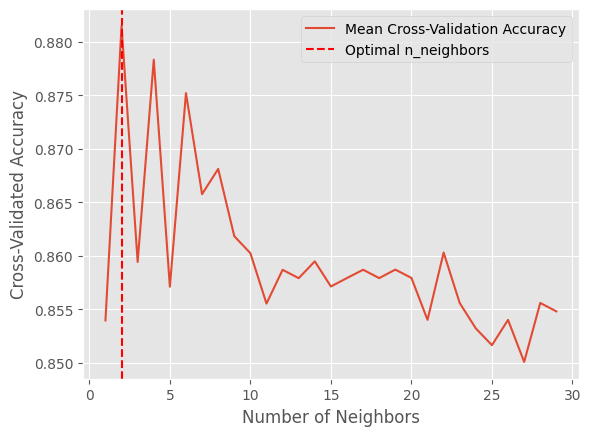

In [592]:
plt.figure()
plt.plot(neighbors_range, cv_scores, label='Mean Cross-Validation Accuracy')
plt.axvline(x=optimal_n_neighbors, color='red', linestyle='--', label='Optimal n_neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()


In [593]:
# using the model K Neighbors Classifier

K_model = KNeighborsClassifier(n_neighbors = optimal_n_neighbors)
K_model.fit(X_train, y_train)

y_pred_k = K_model.predict(X_test)

print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))
print("_ "*40)
print("Classification report")
print(classification_report(y_test, y_pred_k))

Score the X-train with Y-train is :  0.9293563579277865
Score the X-test  with Y-test  is :  0.8714733542319749
 Model Evaluation K Neighbors Classifier : accuracy score  0.8714733542319749
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Classification report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       274
           1       0.59      0.29      0.39        45

    accuracy                           0.87       319
   macro avg       0.74      0.63      0.66       319
weighted avg       0.85      0.87      0.85       319



In [594]:
#Performing cross validation
K_eval = cross_val_score(estimator = K_model, X = X_train, y = y_train, cv = 10)
K_eval.mean()

0.8814653051181102

#Comparison of Models

In [609]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth = optimal_max_depth),
    'SVM': SVC(C=best_C,kernel="rbf"),
    'Random Forest':RandomForestClassifier(n_estimators=optimal_n_estimators),
    'KNN': KNeighborsClassifier(n_neighbors=optimal_n_neighbors)
}
accuracies = {}
cross_evals = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracies[model_name] = accuracy_score(y_test, predictions).round(2)
    cross_evals[model_name] = cross_val_score(model,X_train,y_train,cv=10).mean().round(2)

accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
cross_eval_df = pd.DataFrame(list(cross_evals.items()),columns=['Model','Cross_val_score'])

accuracy_df

,Model,Accuracy
0,Logistic Regression,0.87
1,Decision Tree,0.86
2,SVM,0.86
3,Random Forest,0.86
4,KNN,0.87


In [610]:
cross_eval_df

,Model,Cross_val_score
0,Logistic Regression,0.86
1,Decision Tree,0.86
2,SVM,0.87
3,Random Forest,0.88
4,KNN,0.88


In [611]:
print("The highest accuracy score was obtained by:")
max_value = accuracy_df.iloc[:, 1].max()
values_in_first_column = accuracy_df[accuracy_df.iloc[:, 1] == max_value].iloc[:, 0]
print(values_in_first_column)

The highest accuracy score was obtained by:
0    Logistic Regression
4                    KNN
Name: Model, dtype: object


In [606]:
print("The highest cross validation score was obtained by:")
max_value = cross_eval_df.iloc[:, 1].max()
values_in_first_column = cross_eval_df[cross_eval_df.iloc[:, 1] == max_value].iloc[:, 0]
print(values_in_first_column)

The highest cross validation score was obtained by:
3    Random Forest
4              KNN
Name: Model, dtype: object


#Thank you!
#Hope you found this model helpful!